# EDA: Exploratory Data Analysis

- tools: `pandas`, `seaborn` & `matplotlib`
- concepts:
    - structure
    - granularity
    - scope 
    - temporality
    - faithfulness
- EDA Case Studies: Student pre-course survey data

<div class="alert alert-success">
The examples and data in this notebook are largely adapted from two places: (1) Jake VanderPlas' <a href="https://github.com/jakevdp/PythonDataScienceHandbook" class="alert-link">Python Data Science Handbook</a> and (2) Berkeley's <a href="https://www.textbook.ds100.org/ch/06/viz_intro.html" class="alert-link">Data 100 Textbook</a>. Feel free to check out these resources for more!
</div>

## Exploratory data analysis (EDA)

> an approach to completely and fully understand your dataset.

It requires a state of flexibility and a willingness to look for both:
- artifacts in the data we anticipate exist 
- artifacts that we don't expect / believe are there



![eda](img/exploratory.png)


## Setup

In [31]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=1.5)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# make sure pandas & numpy are imported
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# EDA

In the [Data 100 Textbook](https://www.textbook.ds100.org/ch/05/eda_intro.html), the authors state that with EDA, "We seek to understand the following properties about our data":

- Structure: the format of our data file.
- Granularity: how fine or coarse each row and column is.
- Scope: how (in)complete our data are.
- Temporality: how the data are situated in time.
- Faithfulness: how well the data captures "reality".

# Structure

What is the format of our data file?

<div class="alert alert-info">
The <b>structure</b> of your data describes the "shape" of the dataset. This refers to the format that the data are stored.
</div>

#### Questions to be able to answer about the structure of your dataset:
1. What format are the data in?
    - tabular (CSV, TSV, Excel, SQL)
    - nested (XML, JSON)  
    - streaming (Arrow, Parquet)

2. Is each observation in a separate row? 
    - If not, can we get it into that format?
    - If the data are nested, how would we unnest the data

3. What variables (columns) do we have information about?
    - what `type` of information is in each column
    - Do we have all of the variables we need?    

4. Are the data spread across multiple tables? 
    - How do we want to join the data?
    

# Granularity
How fine or coarse is the data stored in each row and column?

<div class="alert alert-info">
The <b>granularity</b> of your data is what each observation in your data represents.
</div>

Often, the observation will be a **single individual** (i.e. information about each person who has called into a call center). 

Other times, it will be data collected about a **single individual at a particular time** (i.e. information about each call received on a given day) - Note that the same individual could be in this dataset multiple times.

Other times, each row will contain a **summary about a number of indidivuals** (i.e. total number of calls received at a call center each day) - Here, each row would contain summarized information about a whole bunch of people.

## Individual Level Granularity

In this example, we see that each observation represents a single individual.

In [32]:
calls = pd.DataFrame(
    [["Joey",      "suspected poisoning",  42,  "M"],
     ["Weiwei",    "ingested substance",   50,  "F"],
     ["Joey",      "chemical in eye",       8,  "M"],
     ["Karina",    "ingested substance",    7,  "F"],
     ["Nhi",       "ingested substance",    3,  "F"],
     ["Sam",       "chemical on skin",     42,  "M"]], 
    columns = ["Name", "Complaint", "Age", "Gender"])

calls

,Name,Complaint,Age,Gender
0,Joey,suspected poisoning,42,M
1,Weiwei,ingested substance,50,F
2,Joey,chemical in eye,8,M
3,Karina,ingested substance,7,F
4,Nhi,ingested substance,3,F
5,Sam,chemical on skin,42,M


## Group-Level Granularity

However often the data we're handed have observations (rows) that summarize information across many individuals.

In [33]:
calls_total = pd.DataFrame(
    [["2019-08-29", 100],
    ["2019-08-30",  212],
    ["2019-08-31",  88],
    ["2019-09-01",  160],
    ["2019-09-02",  122],
    ], 
    columns = ["Date", "Calls"])

calls_total

,Date,Calls
0,2019-08-29,100
1,2019-08-30,212
2,2019-08-31,88
3,2019-09-01,160
4,2019-09-02,122


#### Questions to be able to answer about the granularity of your dataset:
1. What does each record (row) represent?

2. Do all records uniformly represent the same level of granularity
   - are some rows individual-level, while others are summaries of the group? How will this be handled?

3. Were the data summarized or aggregated?
    - How were they grouped & summarized
    - What metrics were used for summarization (means and medians are common)

4. What aggregations/summarizations do we plan to do with these data?
    

# Scope

How (in)complete are our data?

<div class="alert alert-info">
The <b>scope</b> of your data describes how helpful these data are with respect to our data science question.
</div>

At this point, **descriptive statistics** & **exploratory visualizations** become pretty essential.

- Descriptive Statistics - help to summarize typical values and ranges for variables of interest
- Exploratory Visualizations - help us understand the distributions of individual variables and relationships between variables in our dataset

We'll also want to start to determine how frequently, for what variables, and why data are **missing**.

# Temporality
How are these data situated in time?

<div class="alert alert-info">
The <b>temporality</b> refers to how the data are situated in time. Specifically, we're interested in what data and time information are included in the dataset.
</div>


#### Questions to be able to answer about the temporality of your dataset:
1. What do reported times represent?
    - What does each date and time in the dataset mean? Time event occurred? Time reported?
    - Note that **timezones** & **Daylight Saving Time** are always important to consider    

2. How are the dates/times represented? What format are they in?
   - YYYY-MM-DD? Year? Time? Date & Time?

3. How are null timestamps represented? 
    - was a "random" date picked?
        - `Jan 1st 1990` <- Excel's default date
        - `Jan 1st, 1904` <- Excel's default date *on Mac*
        - `12:00am Jan 1st, 1970`<- [Unix Epoch for Timestamps](https://www.wikiwand.com/en/Unix_time#/Encoding_time_as_a_number)
    - `-999`, `NaN`, `NA`

4. What aggregations/summarizations do we plan to do with these data?

5. Are the variables _stationary_? Does the mean or variance change as time goes on?

# Faithfulness
How well do these data reflect reality?


<div class="alert alert-info">
The <b>faithfulness</b> of your data is a determination of how trustworthy the data are.
</div>

#### Questions to be able to answer about the faithfulness of your dataset:
1. Are the values reasonable / what we expect? 
    - Unreasonable values examples: dates in the future, locations that don't exist, negative counts, wild outliers

2. Are there inconsistencies across tables?
    - Identifiers that don't match?
    - Date of Births that differ between two tables?
    - Any inconsistencies between values stored in more than one table?


3. Are there data entered by hand? These often contain inconsistencies.


4. Any obvious signs of falsification?
    - examples: repeated names, fake looking email addresses, repeated uncommon names or fields

# EDA Case Study: Pre-Course Surveys

Typically you won't be handed a dataset without information about where the data came from or what question you want to ask. But, for the sake of this exercise, let's look at a dataset where you don't have too many specifics  beyond what's in the dataset itself and see what we can figure out through EDA.

## The Data

In [34]:
## load dataset in
df = pd.read_csv('data/pre_survey_data_fa21.csv').drop('Unnamed: 0',axis=1)
df.head()

,new_id,enrolled,To which of the following do you have access to this Spring Quarter?,"Use the map below to answer this question. During this quarter, what time zone are you in? (For example, if you are in San Diego, your answer would be -7. If you are in UTC, respond with 0)","Check all that apply: Before COGS 108, which of the following skills do you feel you possess? (Note: you're not expected to have any of these before taking the class; we're just curious!)",In which of the following programming language(s) are you comfortable? Check all that apply.,"Which of the following topics are you familiar with? (Here, familiar means you could explain the topic clearly to a friend without Googling it first.) Check all that apply.",How comfortable are you with statistics?,How comfortable are you with programming?
0,001_fa21,1,"Reliable Internet, A functioning laptop or tab...",-8.0,None of these,Java,none of the above,4.0,7.0
1,002_fa21,1,"A functioning laptop or tablet, Access to YouTube",8.0,Communicate results concisely and effectively ...,Python,Python,6.0,4.0
2,003_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,004_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,Formulate a plan for and complete a data scien...,"Python, Java, MATLAB, R","data science, version control (i.e. git), GitH...",7.0,10.0
4,005_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Structure

<div class="alert alert-info">
The <b>structure</b> of your data describes the "shape" of the dataset. This refers to the format that the data are stored.
</div>

Let's first clean up those column names for working with these data...

In [36]:
df.columns = ['ID', 'enrolled', 'tech_access', 'timezone', 'objectives_pre', 
              'language', 'topics', 'statistics', 'programming']
df

,ID,enrolled,tech_access,timezone,objectives_pre,language,topics,statistics,programming
0,001_fa21,1,"Reliable Internet, A functioning laptop or tab...",-8.0,None of these,Java,none of the above,4.0,7.0
1,002_fa21,1,"A functioning laptop or tablet, Access to YouTube",8.0,Communicate results concisely and effectively ...,Python,Python,6.0,4.0
2,003_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,004_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,Formulate a plan for and complete a data scien...,"Python, Java, MATLAB, R","data science, version control (i.e. git), GitH...",7.0,10.0
4,005_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
362,NaN,0,"A functioning laptop or tablet, Access to YouTube",-7.0,Formulate a plan for and complete a data scien...,"Python, R","data science, version control (i.e. git), GitH...",4.0,6.0
363,NaN,0,"A functioning laptop or tablet, Access to YouTube",-7.0,None of these,"Python, Java, MATLAB","Python, Jupyter Notebooks, machine learning",2.0,8.0
364,NaN,0,"Reliable Internet, A functioning laptop or tab...",-7.0,Communicate results concisely and effectively ...,MATLAB,none of the above,4.0,3.0
365,NaN,0,"Reliable Internet, A functioning laptop or tab...",-7.0,Communicate results concisely and effectively ...,"Java, None of these (I'm not comfortable progr...",none of the above,4.0,5.0


At a glance and without any additional information, we can tell this is **tabular data** with *observations in rows* and *variables in columns*.

### Clicker Question #1

Should we change the way these data are stored and why?

- A) Yes, nested XML is easier to work with
- B) Yes, observations should be in columns 
- C) Yes, nested JSON is easier to work with
- D) No, observations in rows is best
- E) Some other answer...

Often the first thing you'll want to know is how big the datset is.

In [37]:
## determine shape of dataset
df.shape

(367, 9)

### What type of variable is in each column?

In [38]:
df.dtypes 

ID                 object
enrolled            int64
tech_access        object
timezone          float64
objectives_pre     object
language           object
topics             object
statistics        float64
programming       float64
dtype: object

## Granularity

<div class="alert alert-info">
The <b>granularity</b> of your data is what each observation in your data represents.
</div>

In [39]:
df.head()

,ID,enrolled,tech_access,timezone,objectives_pre,language,topics,statistics,programming
0,001_fa21,1,"Reliable Internet, A functioning laptop or tab...",-8.0,None of these,Java,none of the above,4.0,7.0
1,002_fa21,1,"A functioning laptop or tablet, Access to YouTube",8.0,Communicate results concisely and effectively ...,Python,Python,6.0,4.0
2,003_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,004_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,Formulate a plan for and complete a data scien...,"Python, Java, MATLAB, R","data science, version control (i.e. git), GitH...",7.0,10.0
4,005_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clicker Question #2

What's the granularity of this dataset? 

- A) Individual-Level
- B) Group-level
- C) Individual-level over time
- D) Group-level over time

## Scope

<div class="alert alert-info">
The <b>scope</b> of your data describes how helpful these data are with respect to our data science question.
</div>

In [ ]:
df.shape

### Clicker Question #3

If we wanted to understand something about all COGS 108 students this quarter, could we do that with these data? 

- A) Yes
- B) No
- C) ¯\\\_(ツ)\_/¯

Note: There are currently 315 students enrolled in COGS 108.

## Temporality?

<div class="alert alert-info">
The <b>temporality</b> refers to how the data are situated in time. Specifically, we're interested in what data and time information are included in the dataset.
</div>


Note: I deleted timestamps from the data (just in case students were chatting with one another filling these out, but not sharing the information in them with one another, I didn't want anyone to be able to identify data from any one student), but those data were in there originally.

## Faithfulness?

<div class="alert alert-info">
The <b>faithfulness</b> of your data is a determination of how trustworthy the data are.
</div>

First, the data are self reported. There are always concerns on surveys with faithfulness.

In [ ]:
df.head()

In [40]:
df['enrolled'].value_counts()

1    324
0     43
Name: enrolled, dtype: int64

### Clicker Question #4

But wait...let's think about the information in this dataset...what does the `enrolled` mean? And why are there a bunch of `NaN` values? Have any idea?

- A) I've got some thoughts.
- B) No ideas here...
- C) What am I supposed to be thinking about?

## Observations to include?

In [ ]:
## breakdown of enrolled
df['enrolled'].value_counts()

In [41]:
# only students currently enrolled
df = df[df['enrolled'] == 1]
df.shape

(324, 9)

### Clicker Question #5

What? Prof Ellis told me there were 315 students in this class....why do we have *more* observations than students enrolled?

- A) I've got some thoughts.
- B) No ideas here...
- C) What am I supposed to be thinking about?



In [ ]:
# remove duplicate values
# you would have to figure out which to drop in the real world
# and chck for consistency of responses
df = df.drop_duplicates(subset='ID', keep='last')
df.shape

## Missing values?

In [51]:
null_rows = df.isnull().any(axis=1)
df[null_rows]

,ID,enrolled,tech_access,timezone,objectives_pre,language,topics,statistics,programming
2,003_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,005_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,006_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,007_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,008_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,011_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,058_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,062_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,073_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,076_fa21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clicker Question #6

Why are there so many `NaN`s?

- A) I've got some thoughts.
- B) No ideas here...
- C) What am I supposed to be thinking about?

In [52]:
# we'd expect to drop 36 rows
sum(null_rows)

36

In [53]:
# drop those who didn't respond to the survey
df = df.dropna(how='any').reset_index(drop=True)
df.shape

(288, 9)

In [54]:
df

,ID,enrolled,tech_access,timezone,objectives_pre,language,topics,statistics,programming
0,001_fa21,1,"Reliable Internet, A functioning laptop or tab...",-8.0,None of these,Java,none of the above,4.0,7.0
1,002_fa21,1,"A functioning laptop or tablet, Access to YouTube",8.0,Communicate results concisely and effectively ...,Python,Python,6.0,4.0
2,004_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,Formulate a plan for and complete a data scien...,"Python, Java, MATLAB, R","data science, version control (i.e. git), GitH...",7.0,10.0
3,009_fa21,1,"Reliable Internet, A functioning laptop or tab...",3.0,Formulate a plan for and complete a data scien...,"Python, R","data science, Python, Jupyter Notebooks, confo...",7.0,4.0
4,010_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,None of these,Java,GitHub,4.0,9.0
...,...,...,...,...,...,...,...,...,...
283,311_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,None of these,Java,"Python, A|B testing",3.0,5.0
284,312_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,"Explain and carry out descriptive, exploratory...","Python, Java, MATLAB","version control (i.e. git), GitHub, Python, Ju...",6.0,9.0
285,313_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,"Explain and carry out descriptive, exploratory...",Python,"Python, Jupyter Notebooks, tabular data, p-value",6.0,3.0
286,314_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,"Explain and carry out descriptive, exploratory...",Java,"version control (i.e. git), GitHub, Jupyter No...",7.0,9.0


## Expected values? Wild outliers?

We'll look at each of the variables in the dataset to see if any thing looks *off*.

In [55]:
df.describe()

,enrolled,timezone,statistics,programming
count,288.0,288.000000,288.000000,288.000000
mean,1.0,-5.618056,5.805556,6.923611
std,0.0,4.340871,2.035496,2.172299
min,1.0,-8.000000,1.000000,1.000000
25%,1.0,-7.000000,4.000000,5.000000
50%,1.0,-7.000000,6.000000,7.000000
75%,1.0,-7.000000,7.000000,9.000000
max,1.0,8.000000,10.000000,10.000000


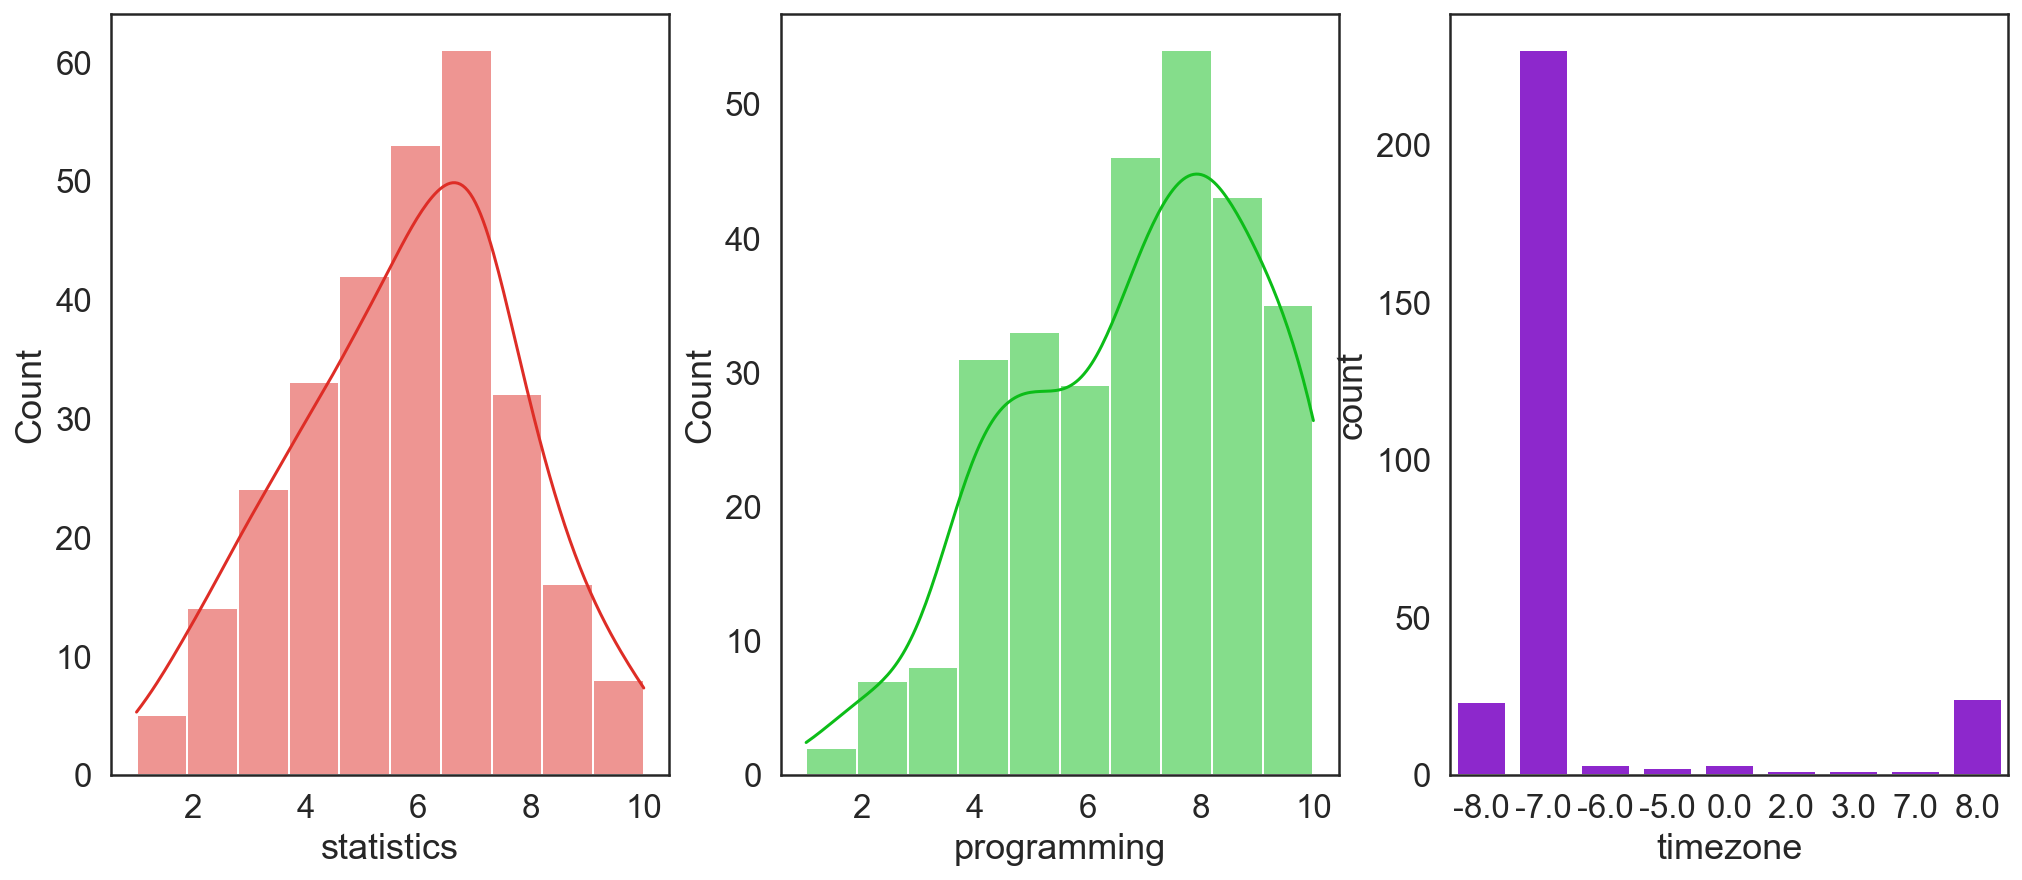

In [56]:
plt.subplot(1, 3, 1)
sns.histplot(df['statistics'], kde=True, color='#DE2D26')
plt.subplot(1, 3, 2)
sns.histplot(df['programming'], kde=True, color='#0CBD18')
plt.subplot(1, 3, 3)
sns.countplot(df['timezone'], color='#940CE8');

## Categorical Columns

Note that we're only focusing on the three columns above, and ignoring `tech_access`, `objectives_pre`, `language`, and `topics`. More cleaning/wrangling would need to be done...I'll show an example of one approach to this for the `language` and `topics` columns now. The idea here is called **one hot encoding** (AKA creating **dummy variables**)

In [57]:
lang = (df.language.str.split('\s*,\s*', expand=True) # split on comma
       .stack() # reshape multilevel index
       .str.get_dummies() # one-hot encode
       .sum(level=0))

In [61]:
df.language.astype('category')

0                         Java
1                       Python
2      Python, Java, MATLAB, R
3                    Python, R
4                         Java
                ...           
283                       Java
284       Python, Java, MATLAB
285                     Python
286                       Java
287               Python, Java
Name: language, Length: 288, dtype: category
Categories (24, object): ['Java', 'Java, MATLAB', 'Java, MATLAB, None of these (I'm not comforta..., 'Java, MATLAB, R', ..., 'Python, None of these (I'm comfortable in ano..., 'Python, None of these (I'm not comfortable pr..., 'Python, R', 'R']

In [58]:
lang

,Java,MATLAB,None of these (I'm comfortable in another language),None of these (I'm not comfortable programming),Python,R
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,1,0,0,1,1
3,0,0,0,0,1,1
4,1,0,0,0,0,0
...,...,...,...,...,...,...
283,1,0,0,0,0,0
284,1,1,0,0,1,0
285,0,0,0,0,1,0
286,1,0,0,0,0,0


In [62]:
# one hot encode topics
topics = (df.topics.str.split('\s*,\s*', expand=True) 
          .stack() 
          .str.get_dummies() 
          .sum(level=0))

In [63]:
topics

,A,B testing,GitHub,JSON,Jupyter Notebooks,Python,confounding,data science,geospatial analysis,machine learning,none of the above,not the animal),p-hacking,p-value,pandas (the package,sentiment analysis,sklearn,tabular data,tetral analysis,version control (i.e. git)
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1
3,0,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
284,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
285,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
286,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [64]:
# join on index (merge on column/series)
# note only joining lang here, not topics
df = df.join(lang, how='outer').reset_index(drop=True)
df

,ID,enrolled,tech_access,timezone,objectives_pre,language,topics,statistics,programming,Java,MATLAB,None of these (I'm comfortable in another language),None of these (I'm not comfortable programming),Python,R
0,001_fa21,1,"Reliable Internet, A functioning laptop or tab...",-8.0,None of these,Java,none of the above,4.0,7.0,1,0,0,0,0,0
1,002_fa21,1,"A functioning laptop or tablet, Access to YouTube",8.0,Communicate results concisely and effectively ...,Python,Python,6.0,4.0,0,0,0,0,1,0
2,004_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,Formulate a plan for and complete a data scien...,"Python, Java, MATLAB, R","data science, version control (i.e. git), GitH...",7.0,10.0,1,1,0,0,1,1
3,009_fa21,1,"Reliable Internet, A functioning laptop or tab...",3.0,Formulate a plan for and complete a data scien...,"Python, R","data science, Python, Jupyter Notebooks, confo...",7.0,4.0,0,0,0,0,1,1
4,010_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,None of these,Java,GitHub,4.0,9.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,311_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,None of these,Java,"Python, A|B testing",3.0,5.0,1,0,0,0,0,0
284,312_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,"Explain and carry out descriptive, exploratory...","Python, Java, MATLAB","version control (i.e. git), GitHub, Python, Ju...",6.0,9.0,1,1,0,0,1,0
285,313_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,"Explain and carry out descriptive, exploratory...",Python,"Python, Jupyter Notebooks, tabular data, p-value",6.0,3.0,0,0,0,0,1,0
286,314_fa21,1,"Reliable Internet, A functioning laptop or tab...",-7.0,"Explain and carry out descriptive, exploratory...",Java,"version control (i.e. git), GitHub, Jupyter No...",7.0,9.0,1,0,0,0,0,0


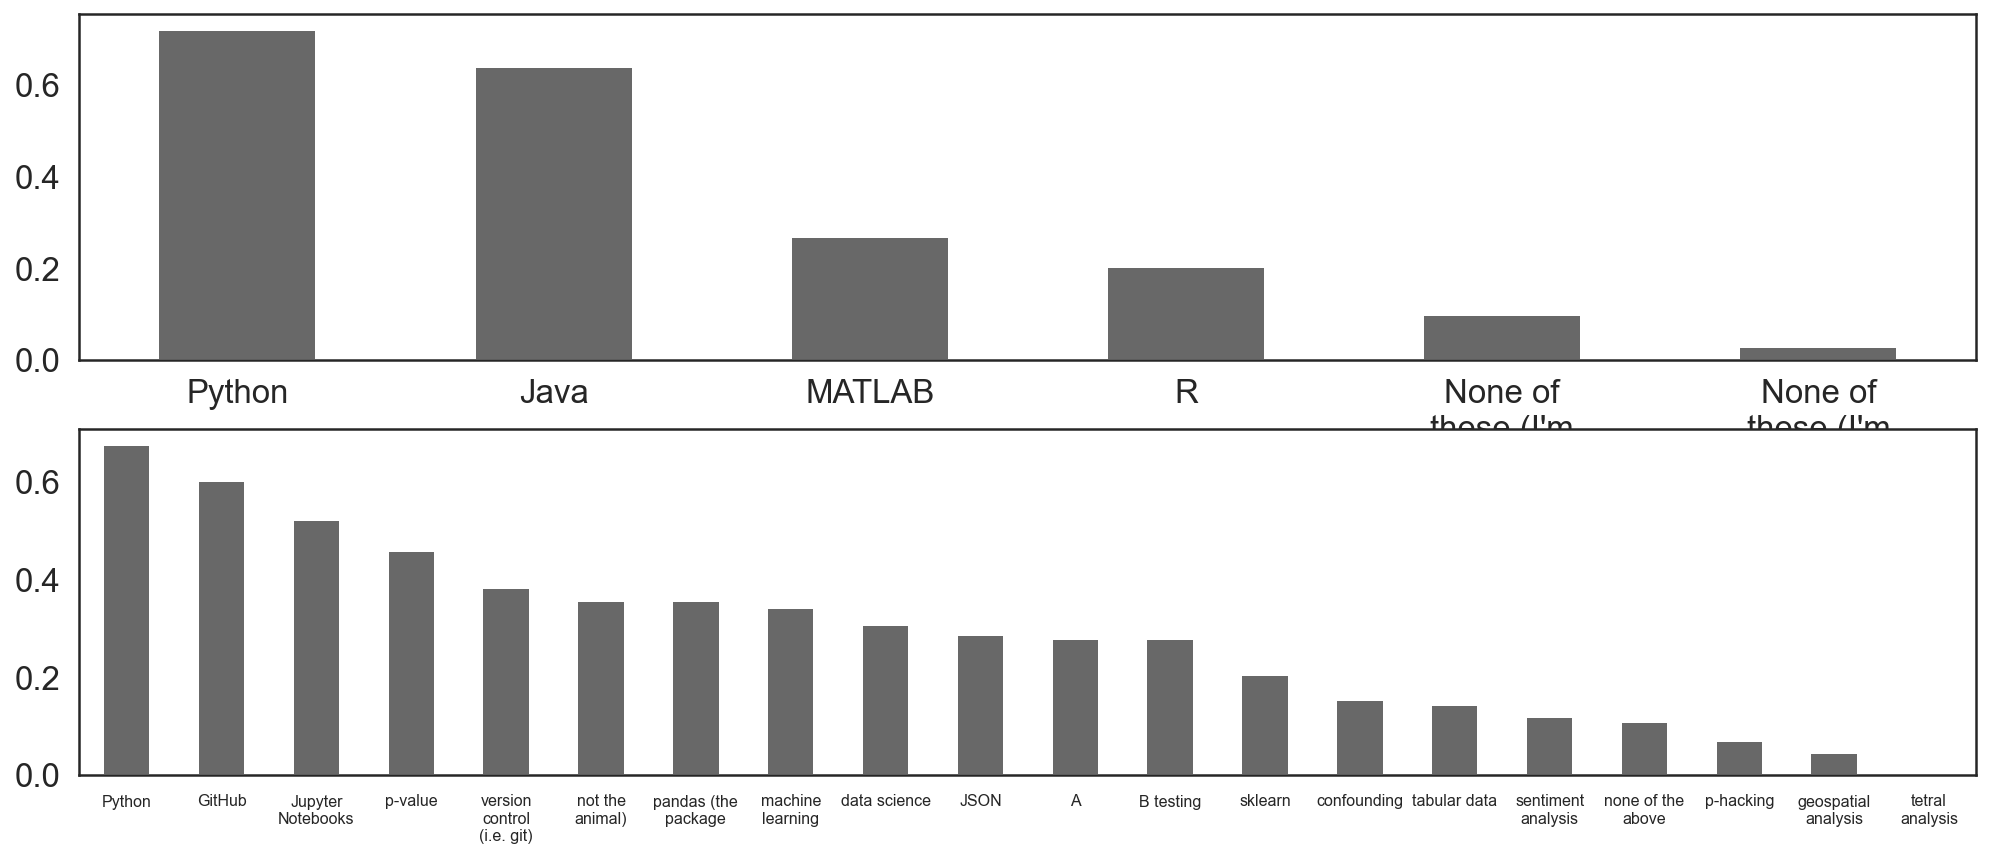

In [65]:
# plot one-hot eoncoded data
plt.subplot(2, 1, 1)
lang.columns = lang.columns.str.wrap(12) # wrap column names
a = lang.sum()/len(df)
a = a.sort_values(axis=0, ascending=False)
a.plot.bar(color='#686868', rot=0)

plt.subplot(2, 1, 2)
topics.columns = topics.columns.str.wrap(12) # wrap column names
a = topics.sum()/len(df)
a = a.sort_values(axis=0, ascending=False)
a.plot.bar(color='#686868', rot=0)
plt.xticks(size = 8);

### Relationship between these variables?

We can use scatterplots to start to get an understanding for how these values are related to one another.

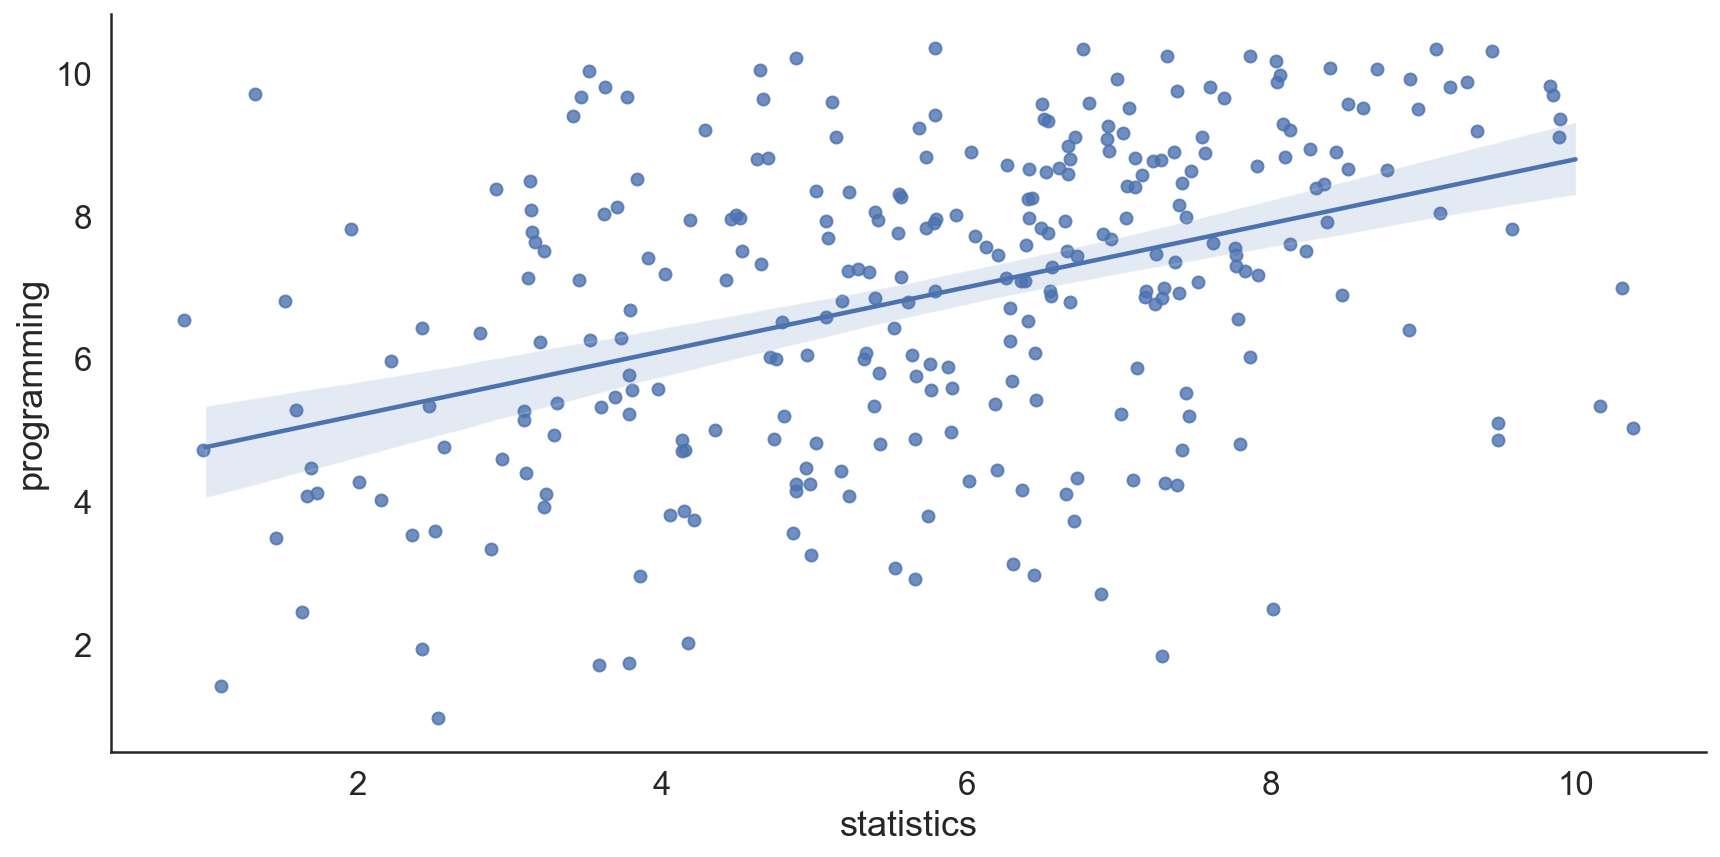

In [69]:
# scatterplot
sns.lmplot(x='statistics', y='programming', 
           data=df, fit_reg=True, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

So we see a relationship...but there's a lot of variability here. And, maybe we're most interested in understanding those who fall further away from the group

In [70]:
# check for multiple conditions
# be sure each condition in parentheses
df[(df['statistics'] > 9) & (df['programming'] < 6)]

,ID,enrolled,tech_access,timezone,objectives_pre,language,topics,statistics,programming,Java,MATLAB,None of these (I'm comfortable in another language),None of these (I'm not comfortable programming),Python,R
200,217_fa21,1,"A functioning laptop or tablet, Access to YouTube",-7.0,Communicate results concisely and effectively ...,Java,"GitHub, p-value",10.0,5.0,1,0,0,0,0,0
210,227_fa21,1,"A functioning laptop or tablet, Access to YouTube",-7.0,Communicate results concisely and effectively ...,"Python, Java, None of these (I'm not comfortab...",A|B testing,10.0,5.0,1,0,0,1,1,0


## Relationships Across Multiple Variables

We've looked at the histograms individually and scatterplots for the relationship, so we wanted to note that it is possible to combine the two in a single matrix plot.

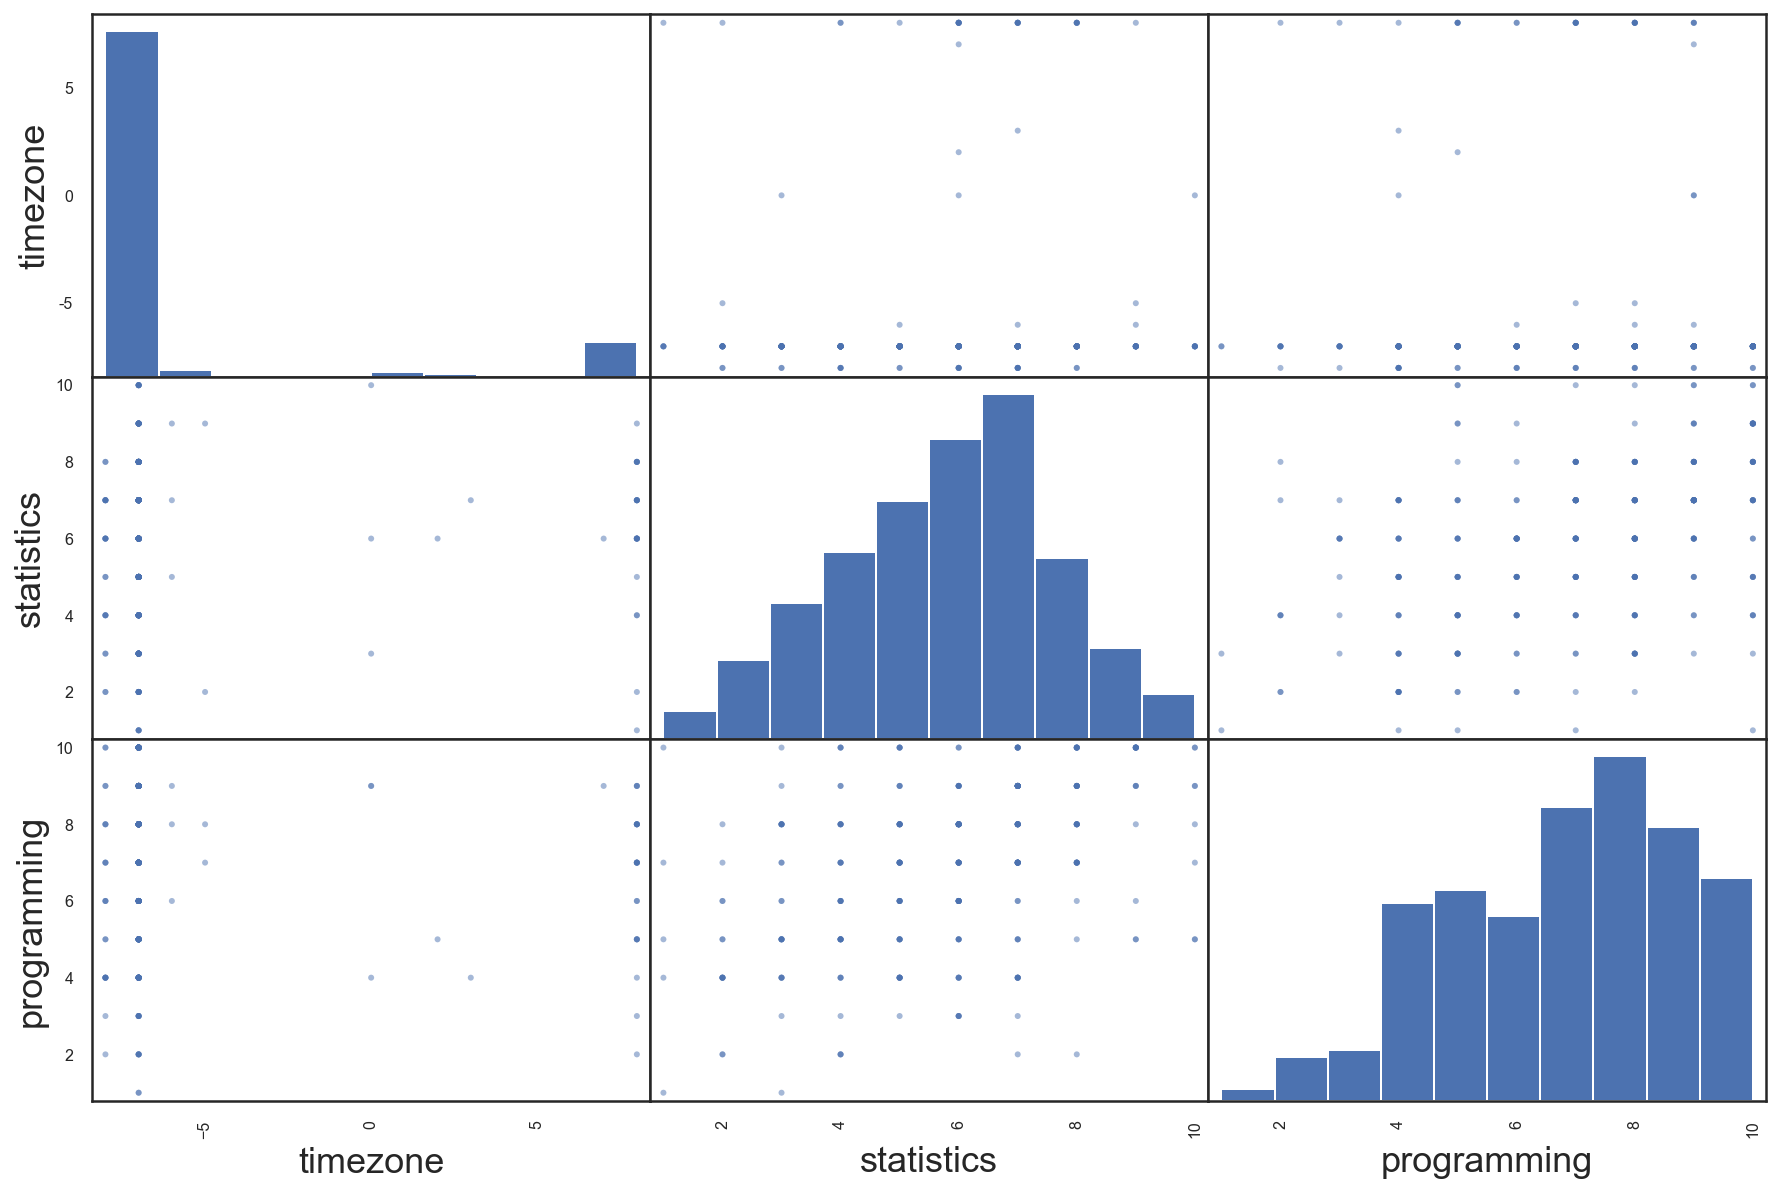

In [71]:
# generate scatter matrix
pd.plotting.scatter_matrix(df[['timezone','statistics','programming']], figsize=(15, 10));

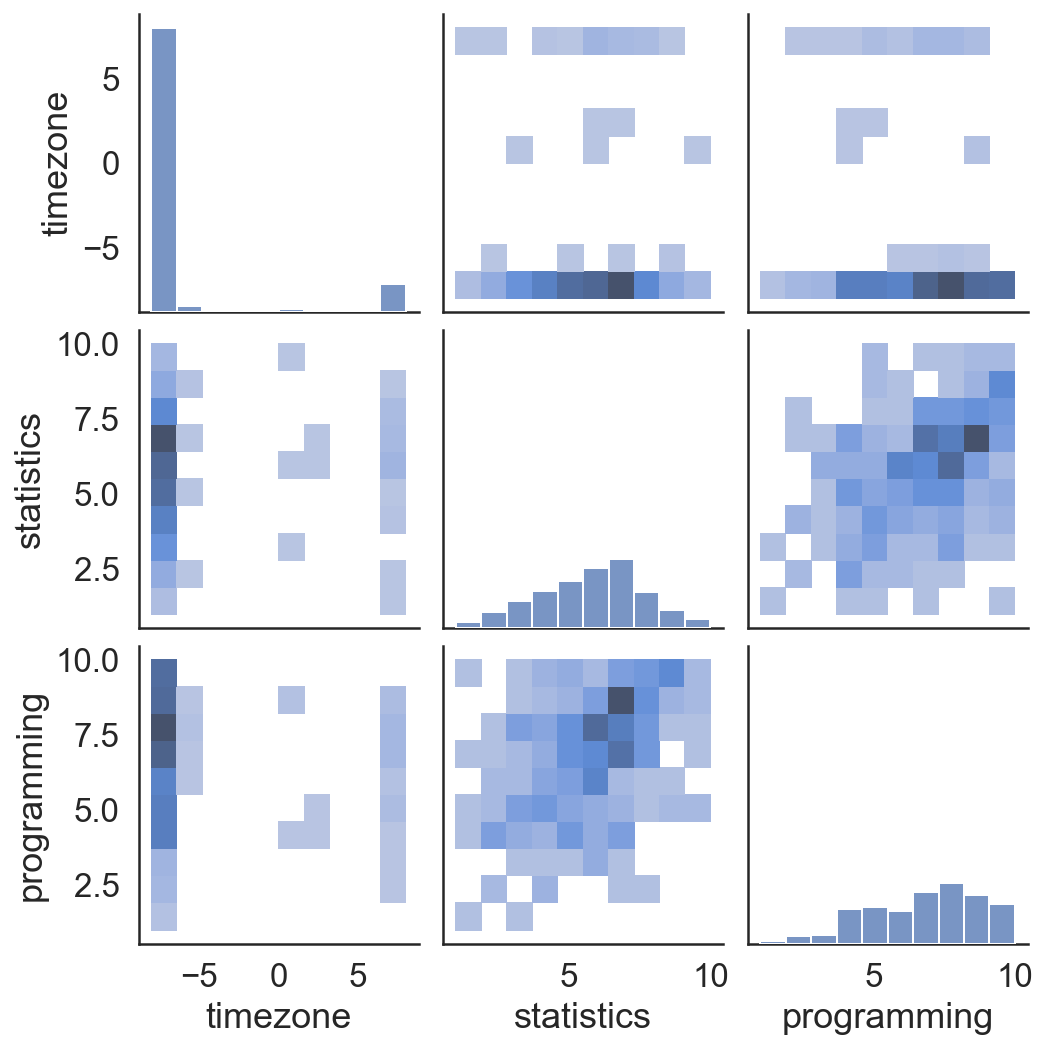

In [83]:
sns.pairplot(data=df.iloc[:,2:9], kind='hist'); #,kind='kde' or 'hist');

In [ ]:
# co-occurrence matrix
lang.T.dot(lang)

In [ ]:
# cooccurrence matrix
topics.T.dot(topics)